# Importing necessary library

In [1]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import t_test_weather_quan
from terminal_script import t_test_weather_city
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Rolling 12-months data

In [3]:
df_02 = read_data('../data/2019_02_ALL.csv')
df_03 = read_data('../data/2019_03_ALL.csv')
df_04 = read_data('../data/2019_04_ALL.csv')
df_05 = read_data('../data/2019_05_ALL.csv')
df_06 = read_data('../data/2019_06_ALL.csv')
df_07 = read_data('../data/2019_07_ALL.csv')
df_08 = read_data('../data/2019_08_ALL.csv')
df_09 = read_data('../data/2019_09_ALL.csv')
df_10 = read_data('../data/2019_10_ALL.csv')
df_11 = read_data('../data/2019_11_ALL.csv')
df_12 = read_data('../data/2019_12_ALL.csv')
df_01 = read_data('../data/2020_01_ALL.csv')

In [4]:
frames = [df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_01]

In [5]:
df_one_year = pd.concat(frames)

# Integrating Weather Data

In [6]:
df_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [7]:
df_weather.columns = ["date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [8]:
df_weather.fillna(value=0, inplace=True)

In [9]:
df_weather.head(5)

,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
0,2019-02-01,4.4,3.3,12.9,0.0,0.0,0.0,0.0
1,2019-02-02,8.2,17.3,12.6,1.0,0.0,0.0,0.0
2,2019-02-03,6.0,3.6,11.4,1.0,0.0,0.0,1.0
3,2019-02-04,7.3,15.7,10.5,1.0,0.0,0.0,1.0
4,2019-02-05,4.3,2.5,7.0,0.0,0.0,0.0,1.0


In [10]:
df_sfo = df_one_year[df_one_year['ORIGIN_CITY_NAME'] == "San Francisco, CA"]

In [11]:
df_sfo_pivot = df_sfo.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
)
df_sfo_pivot = df_sfo_pivot.reset_index()
df_sfo_pivot['FL_DATE'] = pd.to_datetime(df_sfo_pivot['FL_DATE'])

In [12]:
df_sfo_pivot.sample(5)

,ORIGIN_CITY_NAME,FL_DATE,total_flight,avg_delay_min,cancelled_count
51,"San Francisco, CA",2019-03-24,474,11.177215,6.0
209,"San Francisco, CA",2019-08-29,551,12.735027,6.0
350,"San Francisco, CA",2020-01-17,446,11.439462,12.0
338,"San Francisco, CA",2020-01-05,466,11.188841,2.0
363,"San Francisco, CA",2020-01-30,455,13.298901,5.0


In [13]:
df_combined = df_sfo_pivot.join(df_weather.set_index('date'),on='FL_DATE')

In [14]:
df_combined.head(5)

,ORIGIN_CITY_NAME,FL_DATE,total_flight,avg_delay_min,cancelled_count,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
0,"San Francisco, CA",2019-02-01,417,26.160671,43.0,4.4,3.3,12.9,0.0,0.0,0.0,0.0
1,"San Francisco, CA",2019-02-02,329,21.705167,29.0,8.2,17.3,12.6,1.0,0.0,0.0,0.0
2,"San Francisco, CA",2019-02-03,413,11.636804,6.0,6.0,3.6,11.4,1.0,0.0,0.0,1.0
3,"San Francisco, CA",2019-02-04,447,24.861298,15.0,7.3,15.7,10.5,1.0,0.0,0.0,1.0
4,"San Francisco, CA",2019-02-05,422,2.943128,6.0,4.3,2.5,7.0,0.0,0.0,0.0,1.0


In [15]:
df_combined['cancel_rate'] = df_combined['cancelled_count'] / df_combined['total_flight']

In [16]:
df_combined.corr()

,total_flight,avg_delay_min,cancelled_count,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze,cancel_rate
total_flight,1.000000,-0.168144,-0.352158,0.045596,-0.321585,0.404968,-0.216687,-0.041207,-0.078504,0.090710,-0.393657
avg_delay_min,-0.168144,1.000000,0.751466,0.191894,0.518425,-0.088188,0.225791,0.095659,0.326277,0.108300,0.721251
cancelled_count,-0.352158,0.751466,1.000000,0.259371,0.498733,-0.035567,0.158836,-0.007201,0.248912,0.017758,0.994510
avg_wind_spd,0.045596,0.191894,0.259371,1.000000,0.137547,0.193203,-0.073424,-0.204712,0.072925,-0.001433,0.262323
precip,-0.321585,0.518425,0.498733,0.137547,1.000000,-0.234537,0.344332,-0.042706,0.434745,0.160806,0.505795
avg_temp,0.404968,-0.088188,-0.035567,0.193203,-0.234537,1.000000,-0.320325,-0.089624,-0.141233,-0.207294,-0.042442
fog,-0.216687,0.225791,0.158836,-0.073424,0.344332,-0.320325,1.000000,0.179342,0.121372,0.522553,0.155368
heavy_fog,-0.041207,0.095659,-0.007201,-0.204712,-0.042706,-0.089624,0.179342,1.000000,-0.018077,0.086149,-0.009204
thunder,-0.078504,0.326277,0.248912,0.072925,0.434745,-0.141233,0.121372,-0.018077,1.000000,0.073459,0.250235
smoke_haze,0.090710,0.108300,0.017758,-0.001433,0.160806,-0.207294,0.522553,0.086149,0.073459,1.000000,0.008648


Text(0.5, 0.925, 'SFO - Cancellation Rate & Qualitative Weather Conditions')

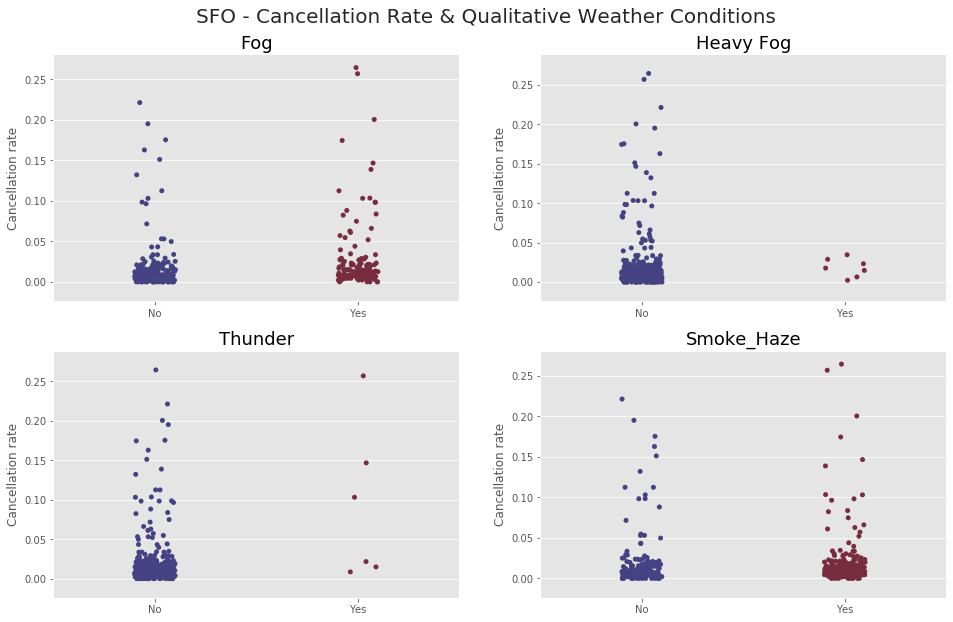

In [17]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
sns.set(font_scale=1.5)

sns.stripplot(x="fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 0],palette='icefire')
sns.stripplot(x="heavy_fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 1],palette='icefire')
sns.stripplot(x="thunder",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 0],palette='icefire')
sns.stripplot(x="smoke_haze",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 1],palette='icefire')

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="",ylabel="Cancellation rate")
axes[0,0].set_title('Fog')
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="",ylabel="Cancellation rate")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="",ylabel="Cancellation rate")
axes[1,0].set_title('Thunder')
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="",ylabel="Cancellation rate")
axes[1,1].set_title('Smoke_Haze')

plt.figtext(.5,.925,'SFO - Cancellation Rate & Qualitative Weather Conditions', fontsize=20, ha='center')

# plt.savefig('../img/cancel_weather_SFO.png', bbox_inches = "tight")

Text(0.5, 0.925, 'SFO - Average Delay Time & Qualitative Weather Conditions')

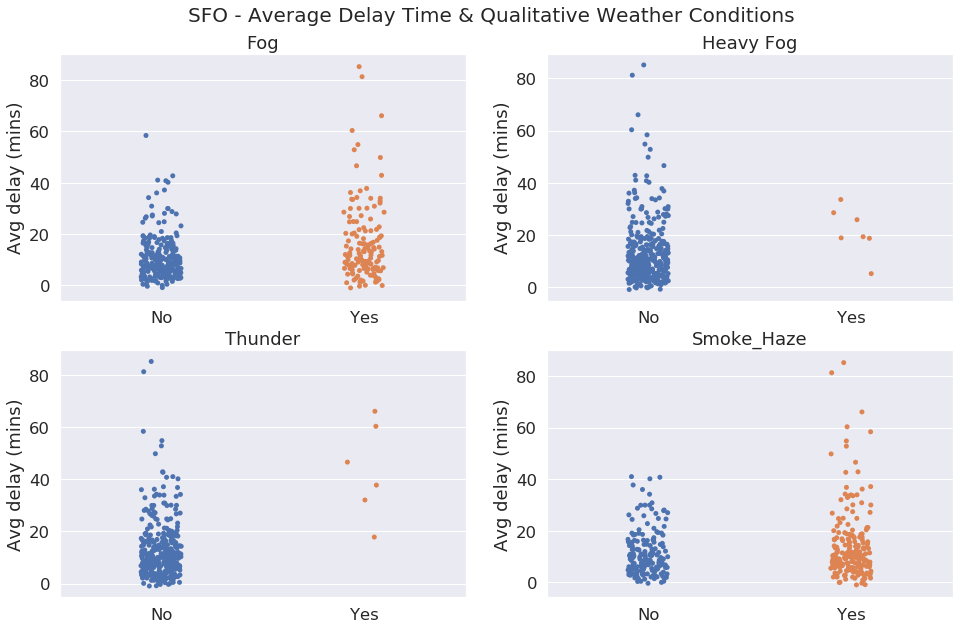

In [18]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
sns.set(font_scale=1.5)

sns.stripplot(x="fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 0])
sns.stripplot(x="heavy_fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 1])
sns.stripplot(x="thunder",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 0])
sns.stripplot(x="smoke_haze",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 1])

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="",ylabel="Avg delay (mins)")
axes[0,0].set_title('Fog')
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="",ylabel="Avg delay (mins)")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="",ylabel="Avg delay (mins)")
axes[1,0].set_title('Thunder')
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="",ylabel="Avg delay (mins)")
axes[1,1].set_title('Smoke_Haze')

plt.figtext(.5,.925,'SFO - Average Delay Time & Qualitative Weather Conditions', fontsize=20, ha='center')

# plt.savefig('../img/delay_weather_SFO.png', bbox_inches = "tight")

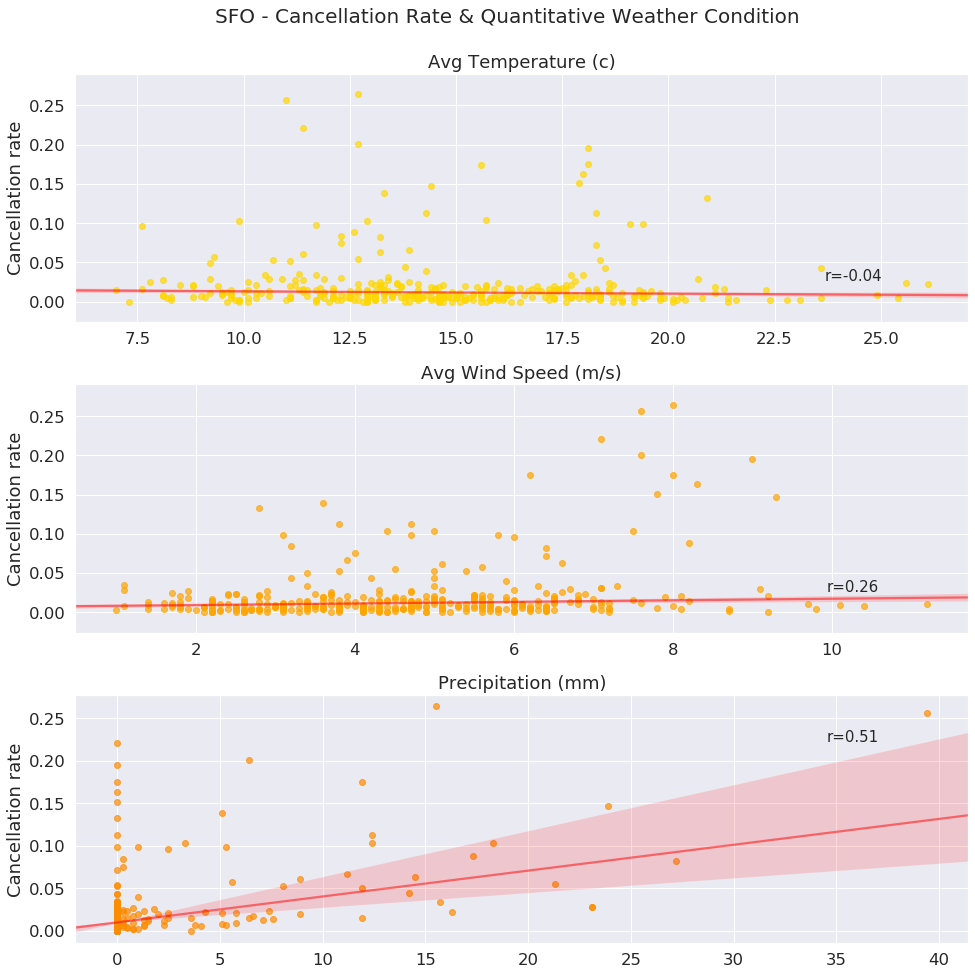

In [19]:
fig, axes = plt.subplots(3,1,figsize=(16,16))
sns.set(font_scale=1.5)

sns.regplot(x='avg_temp',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'gold', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'darkorange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="",ylabel="Cancellation rate")
axes[0].set_title('Avg Temperature (c)')
axes[1].set(xlabel="",ylabel="Cancellation rate")
axes[1].set_title('Avg Wind Speed (m/s)')
axes[2].set(xlabel="",ylabel="Cancellation rate")
axes[2].set_title('Precipitation (mm)')

plt.figtext(.5,.925,'SFO - Cancellation Rate & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.7,'r=-0.04', fontsize=15, ha='center')
plt.figtext(.8,.43,'r=0.26', fontsize=15, ha='center')
plt.figtext(.8,.3,'r=0.51', fontsize=15, ha='center')

plt.subplots_adjust(hspace = 0.25)

# plt.savefig('../img/cancel_weather_SFO_2.png', bbox_inches = "tight")

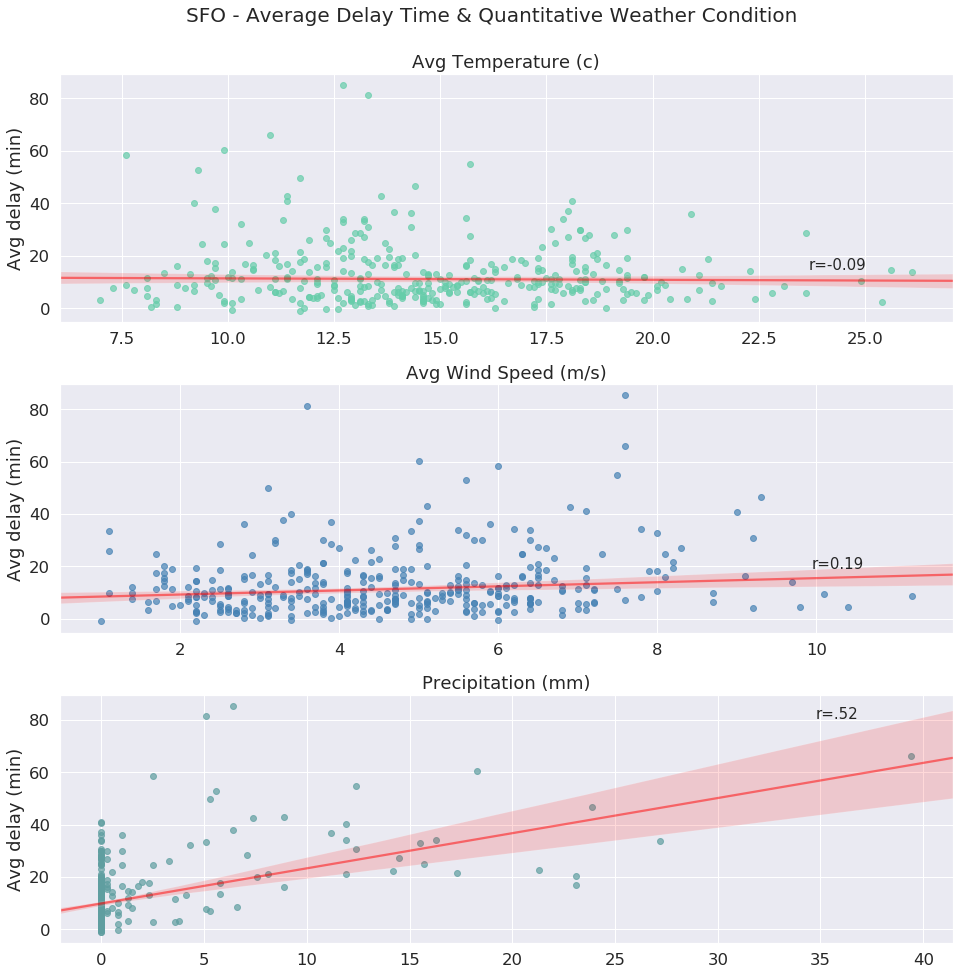

In [20]:
fig, axes = plt.subplots(3,1,figsize=(16,16))
sns.set(font_scale=1.5)

sns.regplot(x='avg_temp',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'mediumaquamarine', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'steelblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'cadetblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="",ylabel="Avg delay (min)")
axes[0].set_title('Avg Temperature (c)')
axes[1].set(xlabel="",ylabel="Avg delay (min)")
axes[1].set_title('Avg Wind Speed (m/s)')
axes[2].set(xlabel="",ylabel="Avg delay (min)")
axes[2].set_title('Precipitation (mm)')

plt.figtext(.5,.925,'SFO - Average Delay Time & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.71,'r=-0.09', fontsize=15, ha='center')
plt.figtext(.8,.45,'r=0.19', fontsize=15, ha='center')
plt.figtext(.8,.32,'r=.52', fontsize=15, ha='center')

plt.subplots_adjust(hspace = 0.25)

# plt.savefig('../img/delay_weather_SFO_2.png', bbox_inches = "tight")

# More Weather

In [21]:
sfo_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])
other_ca_weather = pd.read_csv('../data/19_02_20_01_LA_OAK_SJ_SD_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [22]:
sfo_weather.head()

,NAME,DATE,AWND,PRCP,TAVG,WT01,WT02,WT03,WT08
0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-01,4.4,3.3,12.9,NaN,NaN,NaN,NaN
1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-02,8.2,17.3,12.6,1.0,NaN,NaN,NaN
2,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-03,6.0,3.6,11.4,1.0,NaN,NaN,1.0
3,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-04,7.3,15.7,10.5,1.0,NaN,NaN,1.0
4,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-05,4.3,2.5,7.0,NaN,NaN,NaN,1.0


In [23]:
other_ca_weather.head()

,NAME,DATE,AWND,PRCP,TAVG,WT01,WT02,WT03,WT08
0,"OAKLAND METROPOLITAN, CA US",2019-02-01,13.42,0.14,NaN,NaN,NaN,NaN,NaN
1,"OAKLAND METROPOLITAN, CA US",2019-02-02,21.03,0.44,NaN,1.0,NaN,NaN,NaN
2,"OAKLAND METROPOLITAN, CA US",2019-02-03,15.21,0.04,NaN,1.0,NaN,NaN,1.0
3,"OAKLAND METROPOLITAN, CA US",2019-02-04,18.12,0.54,NaN,1.0,NaN,1.0,1.0
4,"OAKLAND METROPOLITAN, CA US",2019-02-05,7.16,0.10,NaN,NaN,NaN,NaN,NaN


In [24]:
ca_five_weather_df = sfo_weather.append(other_ca_weather)

In [25]:
ca_five_weather_df.columns = ["city","date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [26]:
ca_five_weather_df.head()

,city,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-01,4.4,3.3,12.9,NaN,NaN,NaN,NaN
1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-02,8.2,17.3,12.6,1.0,NaN,NaN,NaN
2,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-03,6.0,3.6,11.4,1.0,NaN,NaN,1.0
3,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-04,7.3,15.7,10.5,1.0,NaN,NaN,1.0
4,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2019-02-05,4.3,2.5,7.0,NaN,NaN,NaN,1.0


In [27]:
ca_five_weather_df.fillna(value=0, inplace=True)

In [28]:
ca_five_weather_df['city'].unique()

array(['SAN FRANCISCO INTERNATIONAL AIRPORT, CA US',
       'OAKLAND METROPOLITAN, CA US',
       'LOS ANGELES INTERNATIONAL AIRPORT, CA US',
       'SAN DIEGO INTERNATIONAL AIRPORT, CA US', 'SAN JOSE, CA US'],
      dtype=object)

In [29]:
ca_five_weather_dict = {'LOS ANGELES INTERNATIONAL AIRPORT, CA US':'Los Angeles, CA','OAKLAND METROPOLITAN, CA US':'Oakland, CA','SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco, CA','SAN DIEGO INTERNATIONAL AIRPORT, CA US': 'San Diego, CA','SAN JOSE, CA US': 'San Jose, CA'}
ca_five_weather_df.replace(to_replace={'city': ca_five_weather_dict}, inplace=True)
ca_five_weather_df.sample(5)

,city,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
631,"Los Angeles, CA",2019-10-26,6.93,0.00,76.0,0.0,0.0,0.0,0.0
474,"Los Angeles, CA",2019-05-22,10.96,0.09,61.0,0.0,0.0,1.0,0.0
1394,"San Jose, CA",2019-11-28,4.92,0.00,0.0,0.0,0.0,0.0,0.0
64,"San Francisco, CA",2019-04-06,4.10,0.00,14.8,0.0,0.0,0.0,0.0
268,"San Francisco, CA",2019-10-27,8.10,0.00,15.6,0.0,0.0,0.0,0.0


In [30]:
ca_five_list = ['Los Angeles, CA','Oakland, CA','San Francisco, CA','San Diego, CA','San Jose, CA']
ca_five_filtered = df_one_year[df_one_year['ORIGIN_CITY_NAME'].isin(ca_five_list)]

In [31]:
ca_five_pivot = ca_five_filtered.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
).reset_index()
ca_five_pivot['FL_DATE'] = pd.to_datetime(ca_five_pivot['FL_DATE'])

In [32]:
ca_five_pivot['cancel_rate'] = ca_five_pivot['cancelled_count'] / ca_five_pivot['total_flight']

In [33]:
ca_five_flight_weather = pd.merge(ca_five_pivot,ca_five_weather_df,left_on=['ORIGIN_CITY_NAME','FL_DATE'],right_on=['city','date'],validate='1:1')

In [34]:
ca_five_flight_weather.sample(5)

,ORIGIN_CITY_NAME,FL_DATE,total_flight,avg_delay_min,cancelled_count,cancel_rate,city,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
1251,"San Francisco, CA",2019-07-08,514,27.402724,9.0,0.017510,"San Francisco, CA",2019-07-08,6.50,0.00,15.7,0.0,0.0,0.0,1.0
1375,"San Francisco, CA",2019-11-09,390,12.012821,6.0,0.015385,"San Francisco, CA",2019-11-09,4.40,0.00,11.4,1.0,0.0,0.0,1.0
1664,"San Jose, CA",2019-08-25,169,2.828402,1.0,0.005917,"San Jose, CA",2019-08-25,6.71,0.00,0.0,0.0,0.0,0.0,0.0
817,"San Diego, CA",2019-04-30,244,3.393443,12.0,0.049180,"San Diego, CA",2019-04-30,5.82,0.07,61.0,1.0,0.0,0.0,0.0
106,"Los Angeles, CA",2019-05-18,482,16.387967,24.0,0.049793,"Los Angeles, CA",2019-05-18,9.40,0.00,62.0,0.0,0.0,0.0,0.0


In [35]:
ca_five_flight_weather_pivot = ca_five_flight_weather.groupby(['ORIGIN_CITY_NAME']).agg(
    total_flight_year = pd.NamedAgg(column='total_flight',aggfunc='sum'),
    fog_count = pd.NamedAgg(column='fog',aggfunc='sum'),
    heavy_fog_count = pd.NamedAgg(column='heavy_fog',aggfunc='sum'),
    thunder_count = pd.NamedAgg(column='thunder',aggfunc='sum'),
    smoke_haze_count = pd.NamedAgg(column='smoke_haze',aggfunc='sum'),
).reset_index()

In [36]:
ca_five_flight_weather_pivot

,ORIGIN_CITY_NAME,total_flight_year,fog_count,heavy_fog_count,thunder_count,smoke_haze_count
0,"Los Angeles, CA",217173,114.0,15.0,8.0,107.0
1,"Oakland, CA",51845,132.0,9.0,4.0,77.0
2,"San Diego, CA",91995,126.0,10.0,6.0,89.0
3,"San Francisco, CA",167753,138.0,7.0,6.0,201.0
4,"San Jose, CA",61970,84.0,5.0,7.0,23.0


In [37]:
ca_five_flight_weather_pivot['fog_rate'] = ca_five_flight_weather_pivot['fog_count'] / 365
ca_five_flight_weather_pivot['heavy_fog_rate'] = ca_five_flight_weather_pivot['heavy_fog_count'] / 365
ca_five_flight_weather_pivot['thunder_rate'] = ca_five_flight_weather_pivot['thunder_count'] / 365
ca_five_flight_weather_pivot['smoke_haze_rate'] = ca_five_flight_weather_pivot['smoke_haze_count'] / 365

In [38]:
ca_five_flight_weather_pivot

,ORIGIN_CITY_NAME,total_flight_year,fog_count,heavy_fog_count,thunder_count,smoke_haze_count,fog_rate,heavy_fog_rate,thunder_rate,smoke_haze_rate
0,"Los Angeles, CA",217173,114.0,15.0,8.0,107.0,0.312329,0.041096,0.021918,0.293151
1,"Oakland, CA",51845,132.0,9.0,4.0,77.0,0.361644,0.024658,0.010959,0.210959
2,"San Diego, CA",91995,126.0,10.0,6.0,89.0,0.345205,0.027397,0.016438,0.243836
3,"San Francisco, CA",167753,138.0,7.0,6.0,201.0,0.378082,0.019178,0.016438,0.550685
4,"San Jose, CA",61970,84.0,5.0,7.0,23.0,0.230137,0.013699,0.019178,0.063014


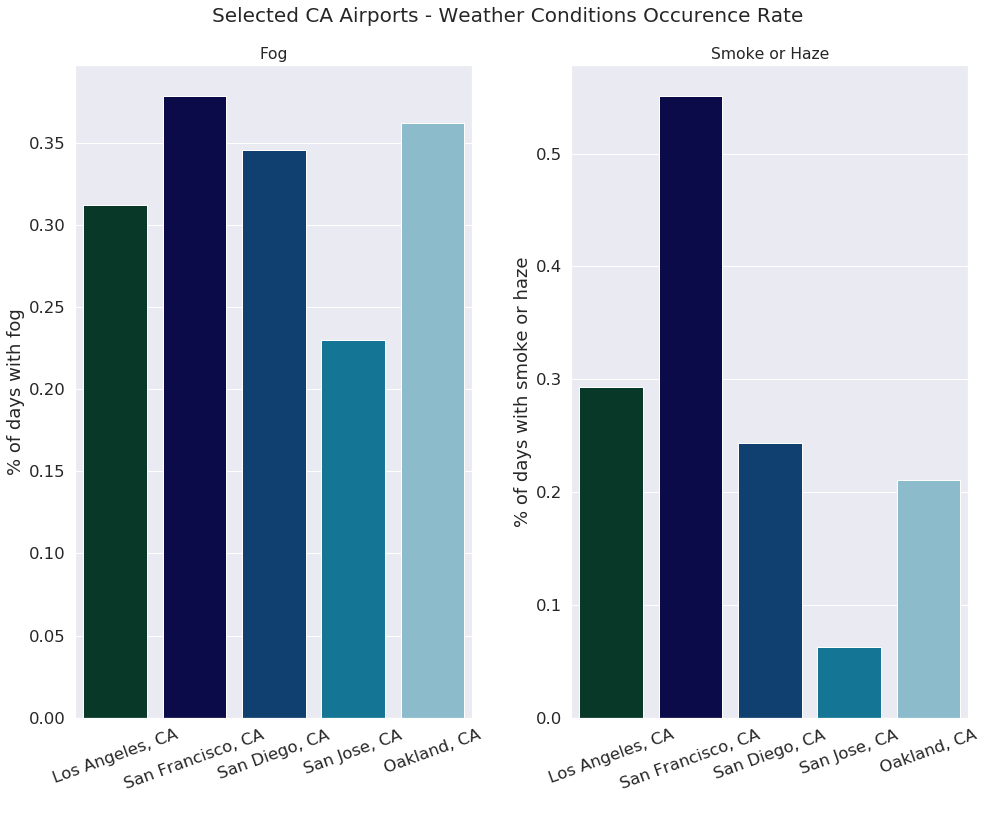

In [39]:
fig, axes = plt.subplots(1,2,figsize=(16,12))
sns.set(font_scale=1.3)

sns.barplot(x='ORIGIN_CITY_NAME',y='fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0])
# sns.barplot(x='ORIGIN_CITY_NAME',y='heavy_fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,1])
# sns.barplot(x='ORIGIN_CITY_NAME',y='thunder_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='smoke_haze_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1])

axes[0].set(ylabel="% of days with fog")
axes[0].set_title('Fog')
# axes[0,1].set(ylabel="% of days with heavy fog")
# axes[0,1].set_title('Heavy Fog')
# axes[1,0].set(ylabel="% of days with thunder")
# axes[1,0].set_title('Thunder')
axes[1].set(ylabel="% of days with smoke or haze")
axes[1].set_title('Smoke or Haze')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.93,'Selected CA Airports - Weather Conditions Occurence Rate', fontsize=20, ha='center')
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
# plt.savefig('../img/weather_CA_2.png', bbox_inches = "tight")

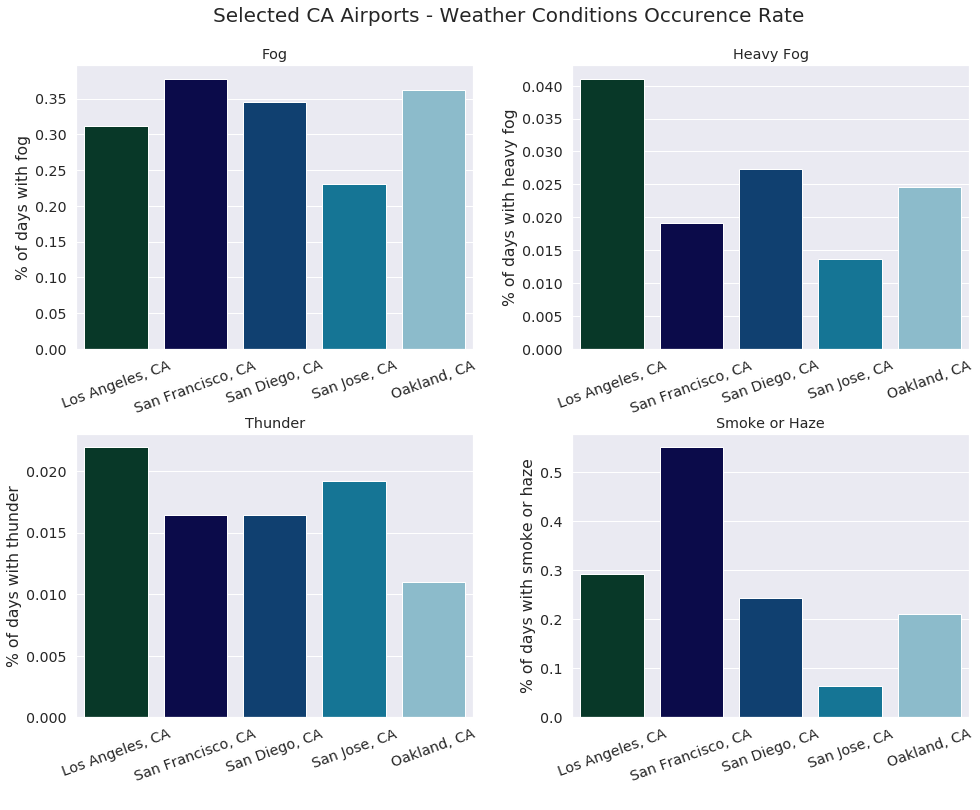

In [40]:
fig, axes = plt.subplots(2,2,figsize=(16,12))
sns.set(font_scale=1.2)

sns.barplot(x='ORIGIN_CITY_NAME',y='fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='heavy_fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,1])
sns.barplot(x='ORIGIN_CITY_NAME',y='thunder_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='smoke_haze_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,1])

axes[0,0].set(ylabel="% of days with fog")
axes[0,0].set_title('Fog')
axes[0,0].set_xlabel(' ')
axes[0,1].set(ylabel="% of days with heavy fog")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set(ylabel="% of days with thunder")
axes[1,0].set_title('Thunder')
axes[1,1].set(ylabel="% of days with smoke or haze")
axes[1,1].set_title('Smoke or Haze')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.93,'Selected CA Airports - Weather Conditions Occurence Rate', fontsize=20, ha='center')
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
# plt.savefig('../img/weather_CA.png', bbox_inches = "tight")

# More t-test about weather

In [41]:
ca_five_flight_weather

,ORIGIN_CITY_NAME,FL_DATE,total_flight,avg_delay_min,cancelled_count,cancel_rate,city,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
0,"Los Angeles, CA",2019-02-01,605,16.117355,7.0,0.011570,"Los Angeles, CA",2019-02-01,6.49,0.01,55.0,0.0,0.0,0.0,0.0
1,"Los Angeles, CA",2019-02-02,468,17.777778,7.0,0.014957,"Los Angeles, CA",2019-02-02,11.41,1.45,57.0,1.0,0.0,0.0,0.0
2,"Los Angeles, CA",2019-02-03,537,9.040968,4.0,0.007449,"Los Angeles, CA",2019-02-03,7.83,0.25,56.0,1.0,0.0,0.0,1.0
3,"Los Angeles, CA",2019-02-04,597,16.695142,13.0,0.021776,"Los Angeles, CA",2019-02-04,12.30,0.27,56.0,1.0,0.0,0.0,0.0
4,"Los Angeles, CA",2019-02-05,552,5.038043,6.0,0.010870,"Los Angeles, CA",2019-02-05,14.32,0.12,54.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,"San Jose, CA",2020-01-27,177,-2.949153,1.0,0.005650,"San Jose, CA",2020-01-27,4.03,0.00,0.0,0.0,0.0,0.0,0.0
1820,"San Jose, CA",2020-01-28,162,-4.234568,5.0,0.030864,"San Jose, CA",2020-01-28,4.47,0.01,0.0,1.0,0.0,0.0,0.0
1821,"San Jose, CA",2020-01-29,168,-2.476190,1.0,0.005952,"San Jose, CA",2020-01-29,7.38,0.00,0.0,0.0,0.0,0.0,0.0
1822,"San Jose, CA",2020-01-30,176,2.971591,0.0,0.000000,"San Jose, CA",2020-01-30,3.36,0.00,0.0,1.0,0.0,0.0,0.0


### LAX weather conditions and cancellation rate

In [42]:
lax_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'Los Angeles, CA']

In [43]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

114 251
11.199373330264914 9.242458882119315
0.7046093225360924
2.7773042245624824 0.0030563608959674003


In [44]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

15 350
8.512513364178506 9.911137253141337
1.5632028239633593
-0.8947168387380128 0.8074932878431003


In [45]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

8 357
10.161257633026278 9.846766605036233
2.1144679261582104
0.1487329384851181 0.4429007120443109


In [46]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

107 258
9.010169809638553 10.203478951282255
0.6350120049319489
-1.8791914678393888 0.9691614723958684


### SFO and weather condition

In [47]:
sfo_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA']

In [48]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 227
16.67798694165874 11.102852222334388
1.4246622846616341
3.9133026678308407 6.290298213264961e-05


In [49]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

7 358
21.40148782123951 13.050556529804853
3.512412931910615
2.3775482704683237 0.026148160199895513


In [50]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

6 359
43.42882753505658 12.70567322342194
7.385401129307606
4.159984511838558 0.004291315517956726


In [51]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

201 164
14.381992181107 11.77517819522138
1.2065631572323254
2.160528415160014 0.015706469058247283


Verify with scipy

In [52]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=3.9133026678308456, pvalue=0.00012580596426529727)

In [53]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=2.160528415160007, pvalue=0.03141293811649509)

### t-test between cities

In [54]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 114
16.67798694165874 11.199373330264914
1.4444944953691103
3.792754924963478 9.903261287700614e-05


In [55]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 251
11.102852222334388 9.242458882119315
0.6630026965182098
2.806011725118188 0.0026528660177452764


In [56]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 132
16.67798694165874 10.483554853129164
1.5097918812441107
4.1028383881791655 2.864196581039635e-05


In [57]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 232
11.102852222334388 8.370759608918156
0.6944841346416992
3.933988520595625 4.96945907246121e-05


In [58]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 84
16.67798694165874 7.7394403337954305
1.5797983904915152
5.658029949683835 2.3964890552093214e-08


In [59]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

227 281
11.102852222334388 4.999873325682397
0.6622974411676662
9.214861053807047 1.6605785350427294e-18
